# LaTeXify Matplotlib: Matplotlib plots for publishing

Every time I would prepare a matplotlib graph for a paper, I would iteratively adjust the figure size, the font size, scaling in LaTeX. This turns to be a tedious process. Fortunately, when along with [Jack](http://www.jack-kelly.com/) and [Oliver](http://www.oliverparson.co.uk/), I was writing our [nilmtk paper](http://arxiv.org/pdf/1404.3878v1.pdf), Jack demonstrated a function to "latexify" plots. This function would take care of font sizes and scaling, so that in one go one could generate a plot and stick in LaTeX. In this post I'll illustrate this technique to save all that iterative effort and make plots look nicer.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

In [2]:
from math import sqrt
SPINE_COLOR = 'gray'

The following is the `latexify` function. It allows you to create 2 column or 1 column figures. You may also wish to alter the `height` or `width` of the figure. The default settings are good for most cases.
You may also change the parameters such as labelsize and fontsize based on your classfile. For this post, I'll use the following [ACM classfile](http://www.acm.org/sigs/publications/proceedings-templates).

In [3]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [4]:
%matplotlib inline

Let us create a dummy data frame

In [5]:
df = pd.DataFrame(np.random.randn(10,2))
df.columns = ['Column 1', 'Column 2']

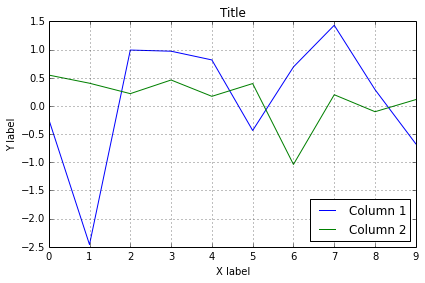

In [6]:
ax = df.plot()
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_title("Title")
plt.tight_layout()
plt.savefig("../files/image1.pdf")

Now, let us call the `latexify` function to alter matplotlib parameters suited to our LaTeX classfile.

In [7]:
latexify()

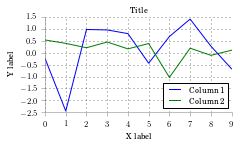

In [8]:
ax = df.plot()
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_title("Title")
plt.tight_layout()
format_axes(ax)
plt.savefig("../files/image2.pdf")

Let us have a quick look at our latex source file. I have scaled down the plot generated by default matploltib settings by 50%. The next plot which is generated using `latexified` settings doesn't need any scaling.

In [9]:
! cat ../files/1.tex

\documentclass{sig-alternate}
\title{Python plots for LaTeX}
\begin{document}
\maketitle
\section{Introduction}
Some random text out here!
\noindent

\begin{figure}
\centering \includegraphics[scale=0.5]{image1.pdf}
\caption{Scaled down of the originial matplotlib plot. Now, the text looks very small.}
\label{image1}
\end{figure}

\begin{figure}
\centering \includegraphics{image2.pdf}
\caption{LaTeXified plot :)}
\label{image2}
\end{figure}


\end{document}

Finally, let us look at the "png" version of our generated pdf.

In [12]:
from wand.image import Image as WImage
img = WImage(filename='../files/1.pdf')

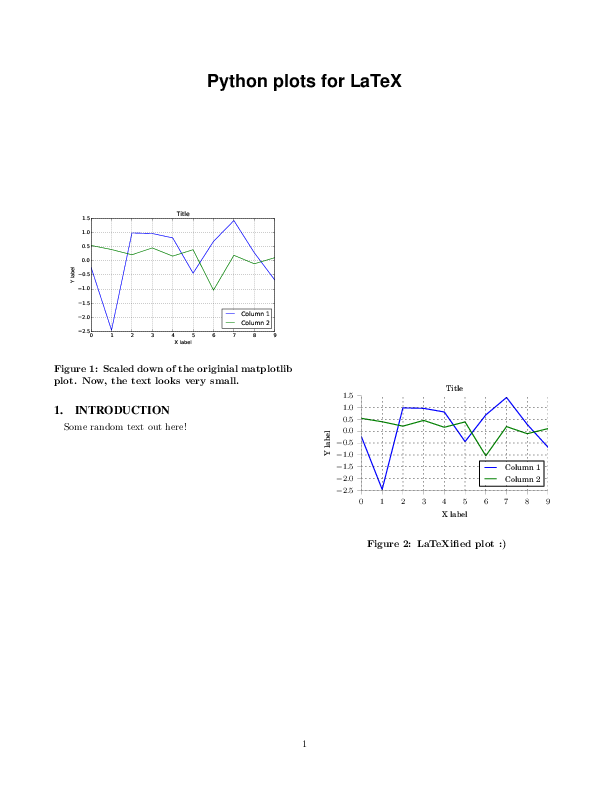

In [13]:
img

Clearly, the LaTeXified version is likely to save you a lot of figure tweaking! You don't need to play with different scaling settings. Nor, do you have to play with font sizes and ofcourse not with a combination of these two which can be pretty hard!